In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_image(original_image, zoom_scale):

    if zoom_scale <= 0 or zoom_scale > 10:
        raise ValueError("Zoom scale must be in the range (0, 10].")

    # Calculate the new dimensions for the zoomed image
    new_dimensions = (original_image.shape[1] * zoom_scale, original_image.shape[0] * zoom_scale)

    # Resize the image using nearest neighbor interpolation
    nearest_neighbor_image = cv2.resize(original_image, new_dimensions, interpolation=cv2.INTER_NEAREST)

    # Resize the image using bilinear interpolation
    bilinear_image = cv2.resize(original_image, new_dimensions, interpolation=cv2.INTER_LINEAR)

    # Create a figure to display the images
    plt.figure(figsize=(10, 5))

    # Show the original image
    plt.subplot(1, 3, 1)
    plt.title(f'Original Image {original_image.shape}')
    plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    # Show the image resized with nearest neighbor interpolation
    plt.subplot(1, 3, 2)
    plt.title(f'Nearest Neighbor (x{zoom_scale})')
    plt.imshow(nearest_neighbor_image, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    # Show the image resized with bilinear interpolation
    plt.subplot(1, 3, 3)
    plt.title(f'Bilinear Interpolation (x{zoom_scale})')
    plt.imshow(bilinear_image, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    # Adjust layout and display the images
    plt.tight_layout()
    plt.show()
    

In [39]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Function to resize the image
def resize_image(image, scale, interpolation):
    height, width = image.shape[:2]
    new_dimensions = (int(width * scale), int(height * scale))
    return cv.resize(image, new_dimensions, interpolation=interpolation)

# Function to calculate normalized SSD between two images
def calculate_normalized_ssd(image1, image2, ignore_size_error=True):
    if not ignore_size_error:
        assert image1.shape == image2.shape, "Images must be the same shape for SSD computation."
    else:
        # Resize the larger image to match the dimensions of the smaller image
        min_height = min(image1.shape[0], image2.shape[0])
        min_width = min(image1.shape[1], image2.shape[1])

        image1 = image1[:min_height, :min_width]
        image2 = image2[:min_height, :min_width]

    # Calculate the sum of squared differences
    ssd_value = np.sum((image1.astype("float32") - image2.astype("float32")) ** 2)
    
    # Normalize by the total number of pixels
    normalized_ssd = ssd_value / np.prod(image1.shape)
    
    return normalized_ssd

# Function to display images side-by-side
def show_images(original, nearest, bilinear, titles):
    plt.figure(figsize=(15, 15))

    # Display original image
    plt.subplot(3, 1, 1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    # Display nearest-neighbor resized image
    plt.subplot(3, 1, 2)
    plt.imshow(cv.cvtColor(nearest, cv.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    # Display bilinear resized image
    plt.subplot(3, 1, 3)
    plt.imshow(cv.cvtColor(bilinear, cv.COLOR_BGR2RGB))
    plt.title(titles[2])
    plt.axis('off')

    plt.show()

# Function to zoom the small image and compute SSD with the original
def process_zoom_and_compare(small_img, big_img, scale_factor=4, ignore_size_error=True):
    # Resize using nearest-neighbor interpolation
    resized_nn = resize_image(small_img, scale_factor, cv.INTER_NEAREST)

    # Resize using bilinear interpolation
    resized_bilinear = resize_image(small_img, scale_factor, cv.INTER_LINEAR)

    # Compute normalized SSD for nearest-neighbor resized image
    ssd_nn = calculate_normalized_ssd(big_img, resized_nn, ignore_size_error=ignore_size_error)

    # Compute normalized SSD for bilinear resized image
    ssd_bilinear = calculate_normalized_ssd(big_img, resized_bilinear, ignore_size_error=ignore_size_error)

    # Print SSD values
    print(f"Normalized SSD (Nearest Neighbor): {ssd_nn}")
    print(f"Normalized SSD (Bilinear): {ssd_bilinear}")

    # Display images with titles
    titles = ["Original Image", f"Nearest Neighbor Zoomed", f"Bilinear Zoomed"]
    show_images(big_img, resized_nn, resized_bilinear, titles)




Normalized SSD (Nearest Neighbor): 136.2690534979424
Normalized SSD (Bilinear): 115.09185185185186


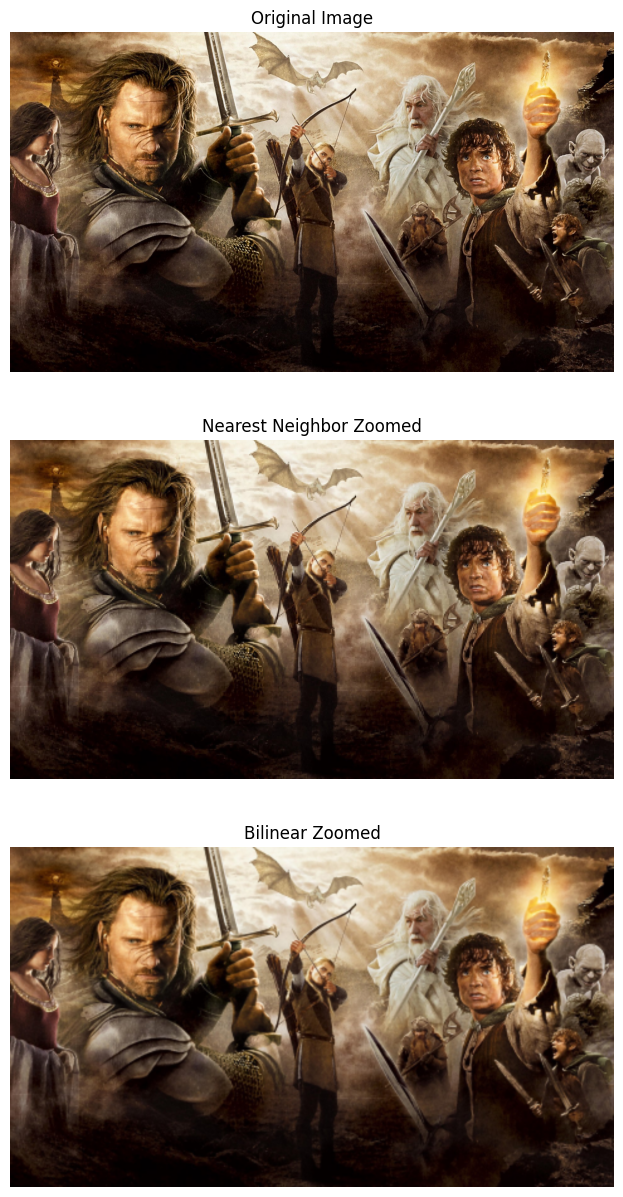

In [40]:
# Load images
im01_small = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/a1q5images/im01small.png")
im01_large = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/a1q5images/im01.png")

# Process and compare images
process_zoom_and_compare(small_img=im01_small, big_img=im01_large, scale_factor=4, ignore_size_error=False)

Normalized SSD (Nearest Neighbor): 26.446071759259258
Normalized SSD (Bilinear): 18.34591087962963


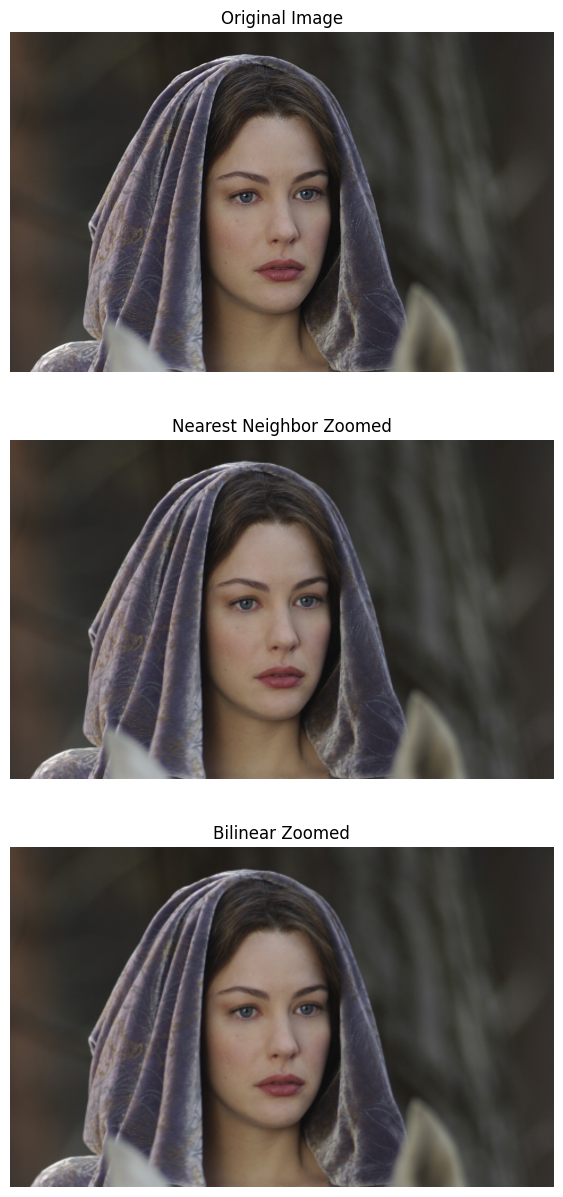

In [41]:
im02_small = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/a1q5images/im02small.png")
im02_large = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/a1q5images/im02.png")
process_zoom_and_compare(small_img=im02_small, big_img=im02_large, scale_factor=4, ignore_size_error=False)


Normalized SSD (Nearest Neighbor): 67.58167390145458
Normalized SSD (Bilinear): 51.20135861701318


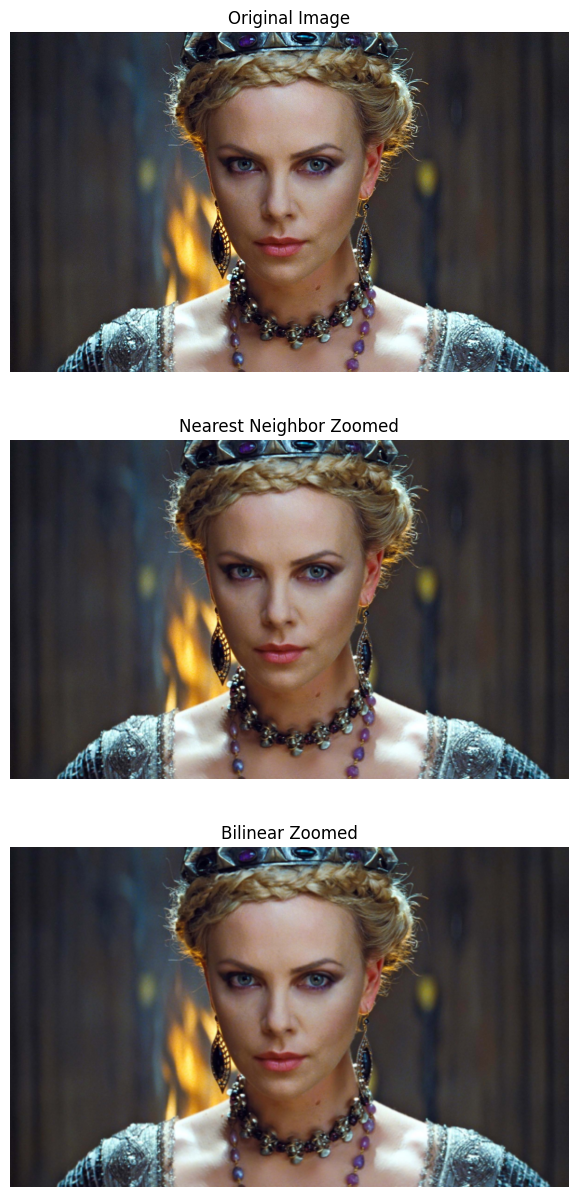

In [42]:
im03_small = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/a1q5images/im03small.png")
im03_large = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/a1q5images/im03.png")
process_zoom_and_compare(small_img=im03_small, big_img=im03_large, scale_factor=4, ignore_size_error=True)



Normalized SSD (Nearest Neighbor): 228.6223
Normalized SSD (Bilinear): 197.4095


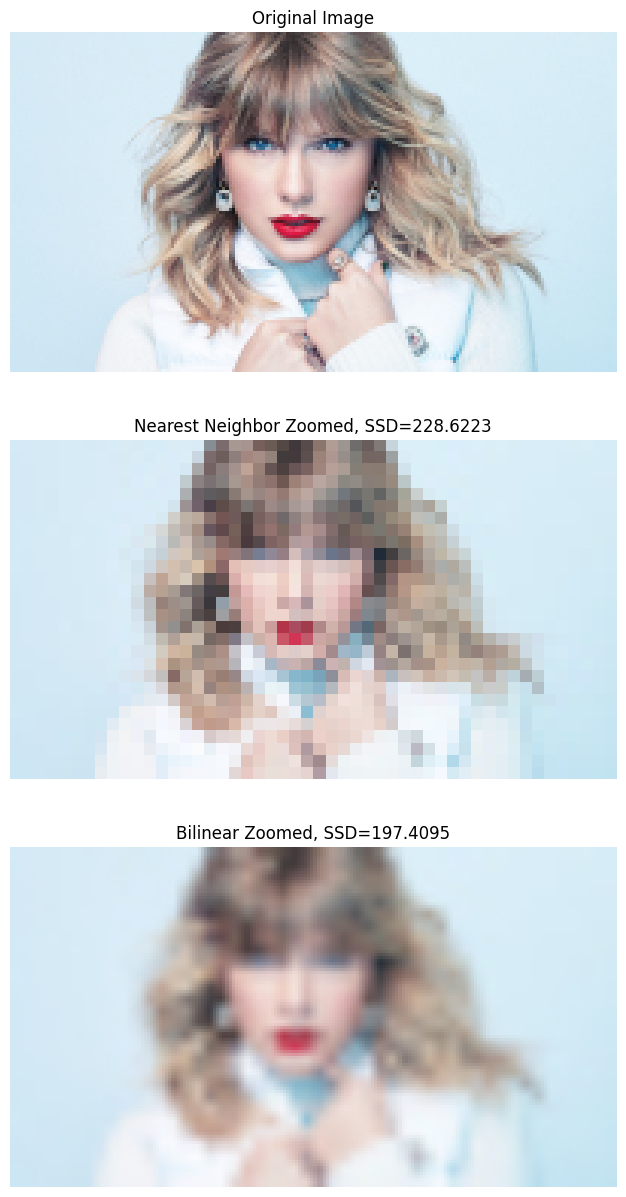

Normalized SSD (Nearest Neighbor): 4231.9576
Normalized SSD (Bilinear): 4166.1419


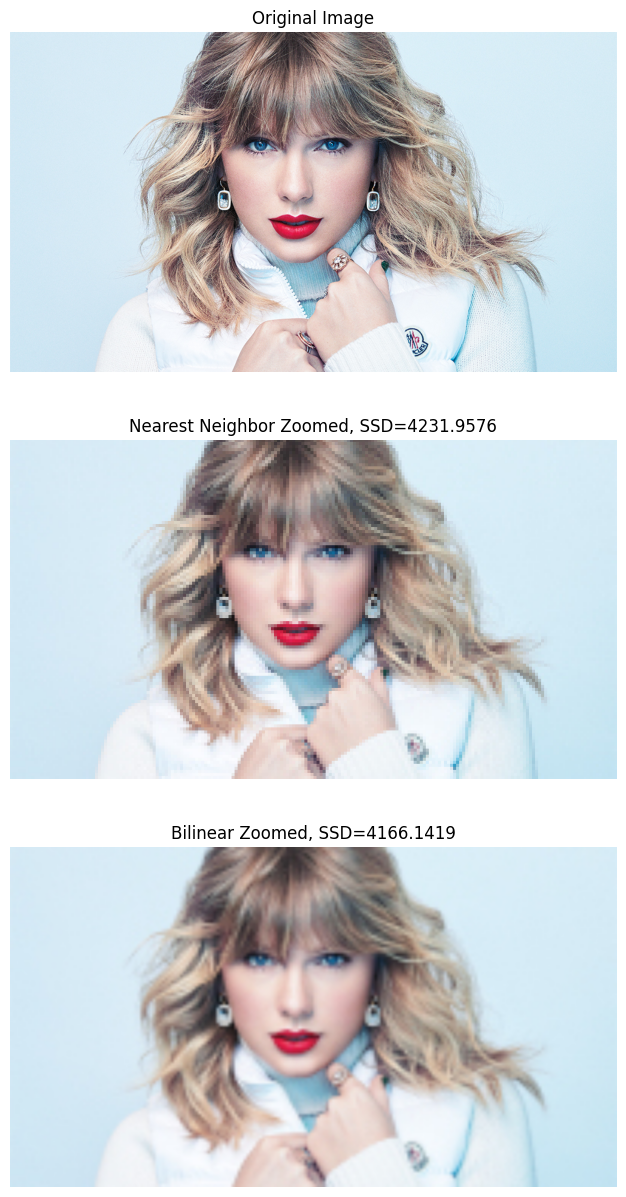

In [43]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Function to resize the image
def resize_image(image, scale, interpolation):
    height, width = image.shape[:2]
    new_dimensions = (int(width * scale), int(height * scale))
    return cv.resize(image, new_dimensions, interpolation=interpolation)

# Function to calculate normalized SSD between two images
def calculate_normalized_ssd(image1, image2, ignore_size_error=True):
    if not ignore_size_error:
        assert image1.shape == image2.shape, "Images must be the same shape for SSD computation."
    else:
        # Resize the larger image to match the dimensions of the smaller image
        min_height = min(image1.shape[0], image2.shape[0])
        min_width = min(image1.shape[1], image2.shape[1])

        image1 = image1[:min_height, :min_width]
        image2 = image2[:min_height, :min_width]

    # Calculate the sum of squared differences
    ssd_value = np.sum((image1.astype("float32") - image2.astype("float32")) ** 2)
    
    # Normalize by the total number of pixels
    normalized_ssd = ssd_value / np.prod(image1.shape)
    
    return normalized_ssd

# Function to display images side-by-side
def show_images(original, nearest, bilinear, titles):
    plt.figure(figsize=(15, 15))

    # Display original image
    plt.subplot(3, 1, 1)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    # Display nearest-neighbor resized image
    plt.subplot(3, 1, 2)
    plt.imshow(cv.cvtColor(nearest, cv.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    # Display bilinear resized image
    plt.subplot(3, 1, 3)
    plt.imshow(cv.cvtColor(bilinear, cv.COLOR_BGR2RGB))
    plt.title(titles[2])
    plt.axis('off')

    plt.show()

# Function to zoom the small image and compute SSD with the original
def process_zoom_and_compare(small_img, big_img, scale_factor=4, ignore_size_error=True):
    # Resize using nearest-neighbor interpolation
    resized_nn = resize_image(small_img, scale_factor, cv.INTER_NEAREST)

    # Resize using bilinear interpolation
    resized_bilinear = resize_image(small_img, scale_factor, cv.INTER_LINEAR)

    # Compute normalized SSD for nearest-neighbor resized image
    ssd_nn = calculate_normalized_ssd(big_img, resized_nn, ignore_size_error=ignore_size_error)

    # Compute normalized SSD for bilinear resized image
    ssd_bilinear = calculate_normalized_ssd(big_img, resized_bilinear, ignore_size_error=ignore_size_error)

    # Print SSD values
    print(f"Normalized SSD (Nearest Neighbor): {ssd_nn:.4f}")
    print(f"Normalized SSD (Bilinear): {ssd_bilinear:.4f}")

    # Display images with titles
    titles = ["Original Image", f"Nearest Neighbor Zoomed, SSD={ssd_nn:.4f}", f"Bilinear Zoomed, SSD={ssd_bilinear:.4f}"]
    show_images(big_img, resized_nn, resized_bilinear, titles)

# Load images
taylor_very_small = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/a1q5images/taylor_very_small.jpg")
taylor_small = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/a1q5images/taylor_small.jpg")
taylor_large = cv.imread("E:/Github_Projects/Intensity-Transformations-and-Neighborhood-Filtering/a1images/a1q5images/taylor.jpg")

# Process the images individually
process_zoom_and_compare(small_img=taylor_very_small, big_img=taylor_small, scale_factor=4, ignore_size_error=True)
process_zoom_and_compare(small_img=taylor_small, big_img=taylor_large, scale_factor=4, ignore_size_error=True)
